# The Effect of loan features on defaulte detection
## by Bassam Abd Elmohsen Shahat

## Investigation Overview

> we have a loans information and we fount that some customers defaulted and we want to know from the features what 
may affect on the customer either defaulted or completed his loan

## Dataset Overview

> we have a dataset that contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
dataset=pd.read_csv('prosperLoanData.csv')
# i will keep only columns that i will use 
dataset=dataset[['Term','LoanStatus','ProsperScore','EmploymentStatus','AmountDelinquent','IncomeRange','StatedMonthlyIncome','TotalProsperLoans',
'LoanCurrentDaysDelinquent','LoanOriginalAmount','MonthlyLoanPayment']]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> the majority of our customers is Customers who pay installments in 36 months 

Text(0.5, 1.0, 'Term distribution')

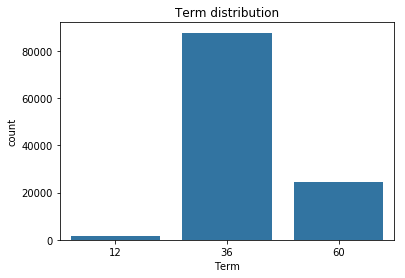

In [3]:
#visualize the term distribution
base_color=sb.color_palette()[0]
sb.countplot(data=dataset,x='Term',color=base_color)
plt.title('Term distribution')

## (Visualization 2)

> most of loans are current and there is a big percentage that completed thair loans and there are more than 13000 chargeoff and about 5000 defaulted 

Text(0.5, 1.0, 'LoanStatus distribution')

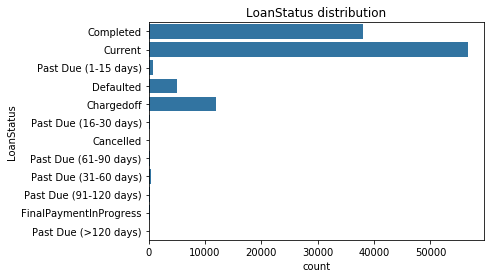

In [4]:
#visualize the LoanStatus 
base_color=sb.color_palette()[0]
sb.countplot(data=dataset,y='LoanStatus',color=base_color)
plt.title('LoanStatus distribution')

## (Visualization 3)

> completed and defaulted loans most of them had a term of 36 months

Text(0.5, 1.0, 'number of each LoanStatus for each Term')

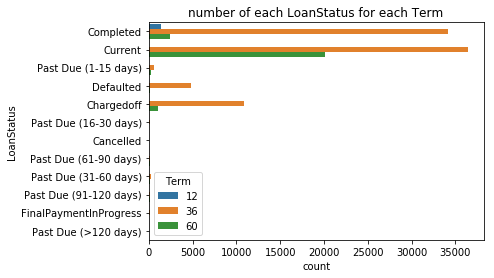

In [5]:
#visualize LoanStatus with Term
sedan_classes = ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
   'Past Due (16-30 days)', 'Cancelled', 'Past Due (61-90 days)',
   'Past Due (31-60 days)', 'Past Due (91-120 days)',
   'FinalPaymentInProgress', 'Past Due (>120 days)']

# plotting
ax = sb.countplot(data = dataset, y = 'LoanStatus', hue = 'Term')
plt.title('number of each LoanStatus for each Term')

## (Visualization 4)
> defulted customers each one of them took a loans that is less than 1000 dollars
> all customers that took a loans more than 1000 dollars either completed their loans or still pay but don`t pay late


Text(0.5, 0.98, 'loanoriginalamount distribution for each loanstatus')

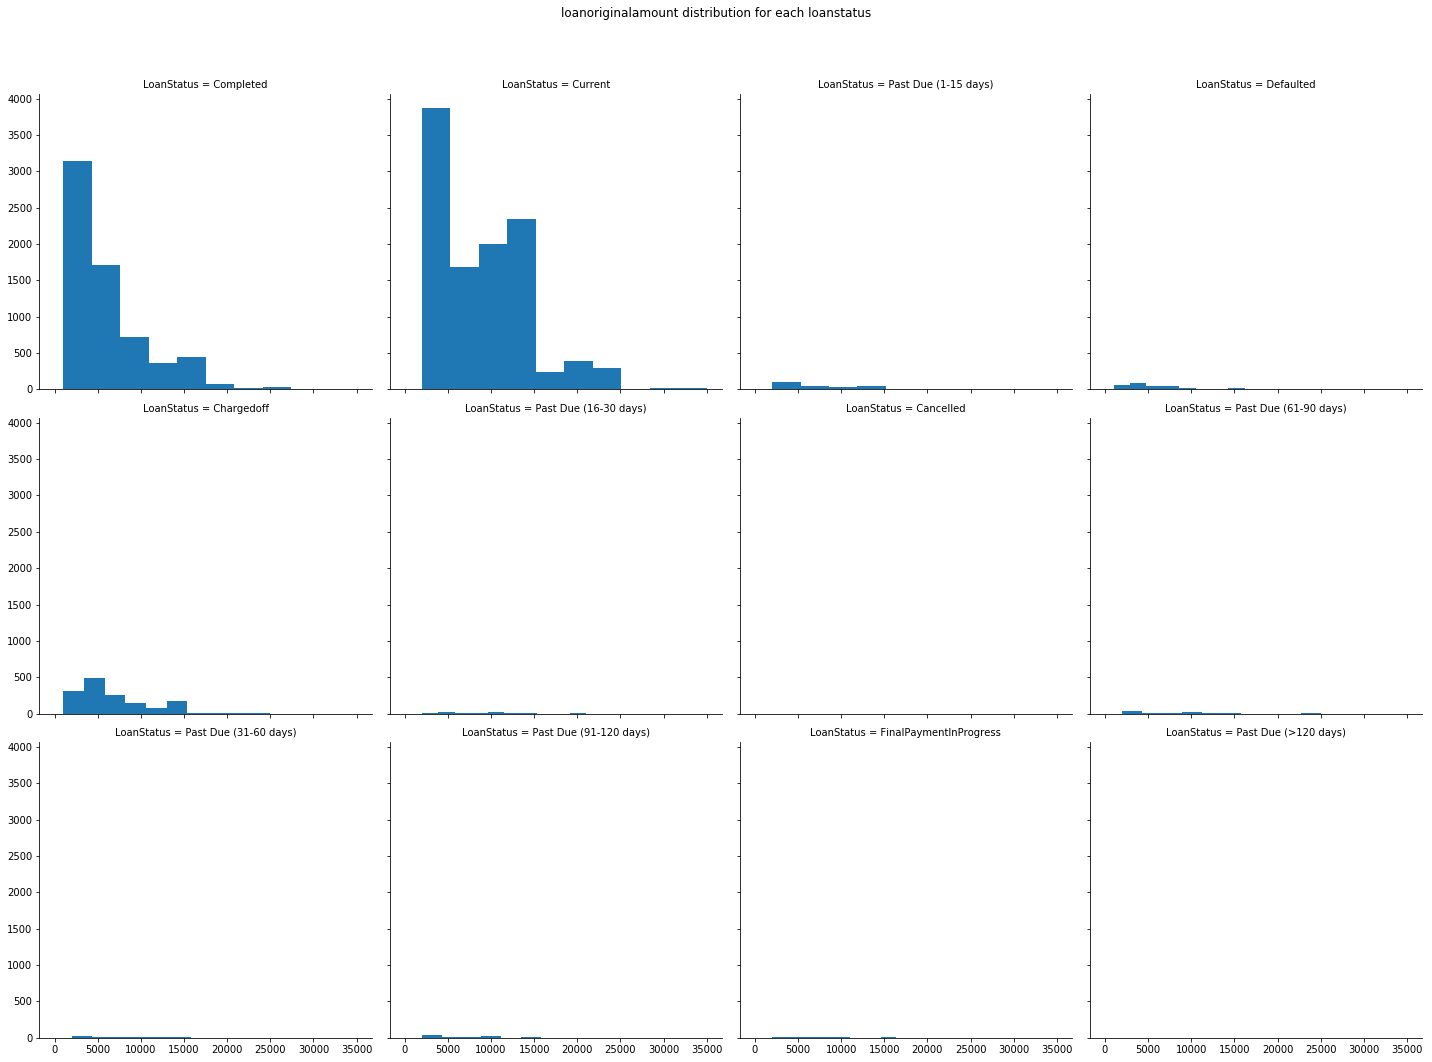

In [6]:
# visualize loanstatus with loanoriginalamount
g = sb.FacetGrid(dataset, col="LoanStatus",col_wrap = 4, size = 5)
g.map_dataframe(plt.hist, x="LoanOriginalAmount")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('loanoriginalamount distribution for each loanstatus')

## (Visualization 5)

> there is a high correlation between LoanOriginalAmount and MonthlyLoanPayment

Text(0.5, 1.0, 'heatmap for all features')

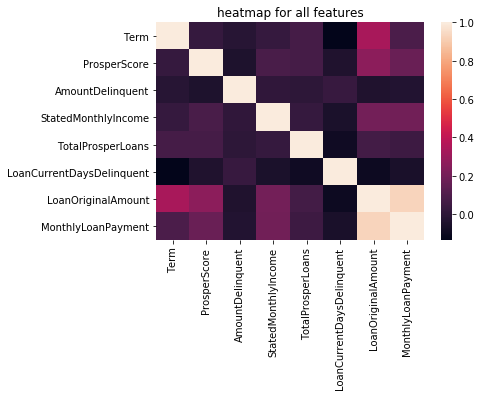

In [7]:
# calculate the correlation matrix
corr = dataset.corr()

# plot the heatmap
sb.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
plt.title('heatmap for all features')

## (Visualization 6)

> term 12 months have lower MonthlyLoanPayment

Text(0.5, 1.0, 'LoanOriginalAmount and MonthlyLoanPayment for each Term')

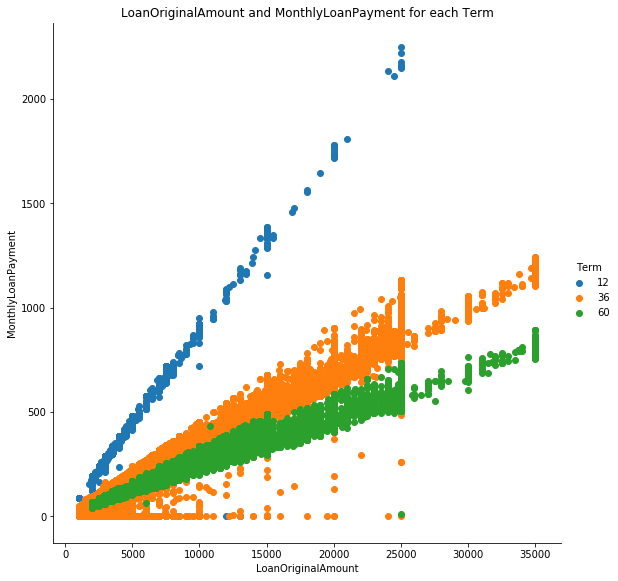

In [8]:
# visualize ('LoanOriginalAmount','MonthlyLoanPayment') for each Term
type_colors = {'12':'#FF5733','36': '#ee99ac', '60': '#7038f8'}

g = sb.FacetGrid(data = dataset, hue = 'Term',size=8)
g.map(plt.scatter, 'LoanOriginalAmount','MonthlyLoanPayment')
g.add_legend()
plt.title('LoanOriginalAmount and MonthlyLoanPayment for each Term')

## (Visualization 7)

> customers that are not employed or have income range = 0 or range from 1 to 24.999 have zero amount delinquent 

Text(0.5, 0.98, 'for each loan range visualize LoanOriginalAmount and AmountDelinquent')

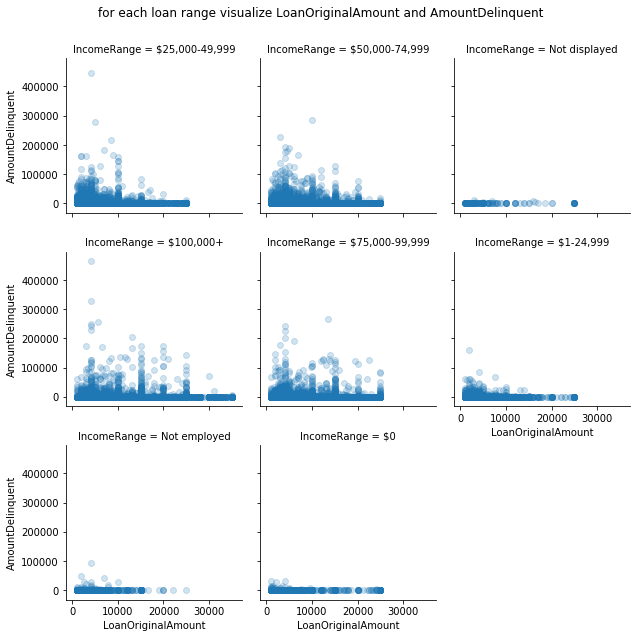

In [9]:
# for each loan range visualize ('LoanOriginalAmount', 'AmountDelinquent')
g = sb.FacetGrid(data = dataset, col = 'IncomeRange', size = 3, col_wrap = 3)
g.map(plt.scatter, 'LoanOriginalAmount', 'AmountDelinquent', alpha = 1/5)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('for each loan range visualize LoanOriginalAmount and AmountDelinquent')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!